In [1]:
"""Implement K-Nearest Neighbors algorithm on diabetes.csv dataset.
Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset."""

'Implement K-Nearest Neighbors algorithm on diabetes.csv dataset.\nCompute confusion matrix, accuracy, error rate, precision and recall on the given dataset.'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [7]:
dataset = pd.read_csv("Dataset\diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

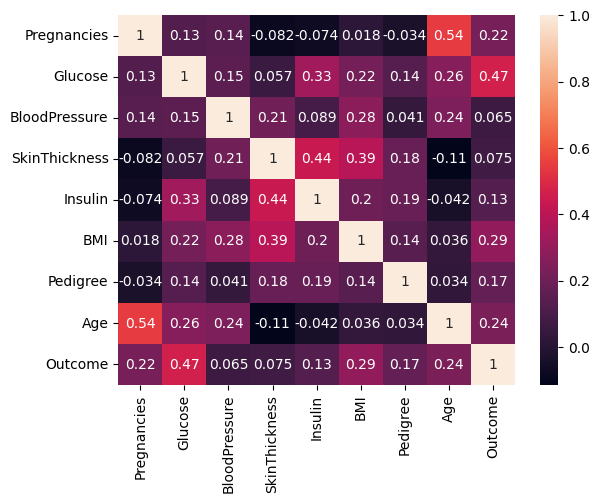

In [8]:
sns.heatmap(dataset.corr(), annot = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataset.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [11]:
X = dataset[["Pregnancies", "Glucose", "Insulin", "BMI", "Age"]]
y = dataset["Outcome"]

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
params = {'n_neighbors': range(1, 20)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params, cv = 5)
gridSearch.fit(X_train, y_train)

print("The Optimal Value of N is ", gridSearch.best_params_)

The Optimal Value of N is  {'n_neighbors': 19}


In [19]:
knn = KNeighborsClassifier(n_neighbors = 14, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [20]:
y_pred = knn.predict(X_test)
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[84 15]
 [24 31]]


In [21]:
print("Accuracy is ", accuracy_score(y_test, y_pred))
print("Precision is ", precision_score(y_test, y_pred))
print("Recall is ", recall_score(y_test, y_pred))

Accuracy is  0.7467532467532467
Precision is  0.6739130434782609
Recall is  0.5636363636363636


In [22]:
k_value = range(1, 20)
error = []
for i in k_value:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

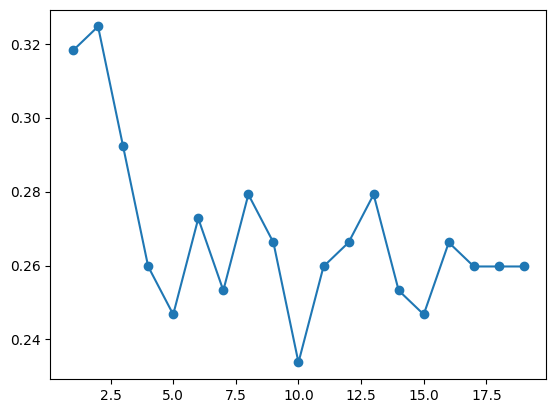

In [23]:
plt.plot(k_value, error, marker = 'o')

In [24]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [25]:
y_pred = knn.predict(X_test)
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[85 14]
 [22 33]]


In [26]:
print("Accuracy is ", accuracy_score(y_test, y_pred))
print("Precision is ", precision_score(y_test, y_pred))
print("Recall is ", recall_score(y_test, y_pred))

Accuracy is  0.7662337662337663
Precision is  0.7021276595744681
Recall is  0.6
